In [1]:
import torch, pandas as pd, os
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
from DQN.agent_eval import head_to_head, plot_winrate_bar
from pprint import pprint
import matplotlib.pyplot as plt

In [3]:
A = "Connect4 DQN model.pt"
#A = "MIXED0 model.pt"
#A = "RANDOM6 model.pt"
B = "RANDOM XVI DQN model.pt"

res = head_to_head(
    A, B,
    n_games=1013, 
    device=device,
    epsilon=0.0,       # no ε during eval
    guard_prob=0.0,    # guard OFF (pure Q)
    opening_noise_k=1, # you can set 1–2 if you want more variety
    seed=666,
    progress=True
)

[load] missing=0, unexpected=0
[load] matched params: 14/14
[load] missing=0, unexpected=0
[load] matched params: 14/14


Connect4 DQN model.pt vs RANDOM XV DQN model.pt: 100%|██████████| 1013/1013 [03:05<00:00,  5.47it/s, D=0, L=516, W=497, score=0.491]


In [4]:
pprint(res)
print(f"\nA score = {res['A_score_rate']:.3f}  (95% CI {res['A_score_CI95'][0]:.3f}–{res['A_score_CI95'][1]:.3f})")

{'A_losses': 516,
 'A_path': 'Connect4 DQN model.pt',
 'A_score_CI95': (0.459821298208533, 0.521422531998772),
 'A_score_rate': 0.4906219151036525,
 'A_wins': 497,
 'B_path': 'RANDOM XV DQN model.pt',
 'draws': 0,
 'games': 1013}

A score = 0.491  (95% CI 0.460–0.521)


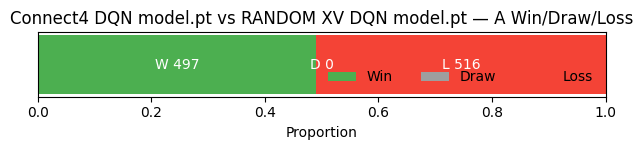

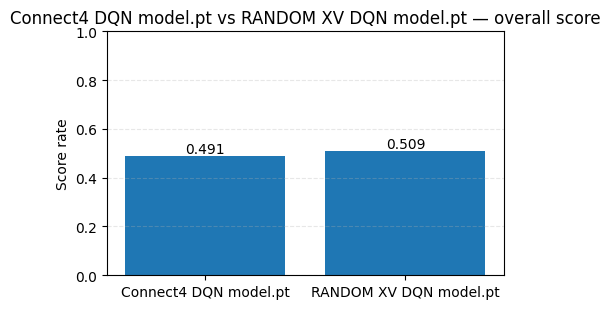

In [5]:
plot_winrate_bar(res)